In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
nan_rows = y.isnull()

In [ ]:
X = X[~nan_rows]
y = y[~nan_rows]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\n--- Model Evaluation (Focus on Fraud Class) ---")


--- Model Evaluation (Focus on Fraud Class) ---


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[9891    1]
 [   7   23]]


In [ ]:
recall = recall_score(y_test, y_pred)
print(f"Fraud Detection Recall Rate (Goal Metric): {recall:.4f}")

Fraud Detection Recall Rate (Goal Metric): 0.7667


In [ ]:
print("\nClassification Report (Focus on Class 1):\n", classification_report(y_test, y_pred))


Classification Report (Focus on Class 1):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9892
         1.0       0.96      0.77      0.85        30

    accuracy                           1.00      9922
   macro avg       0.98      0.88      0.93      9922
weighted avg       1.00      1.00      1.00      9922



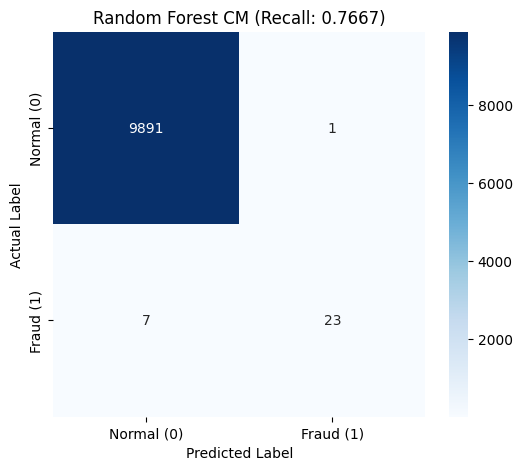

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Fraud (1)'],
            yticklabels=['Normal (0)', 'Fraud (1)'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title(f'Random Forest CM (Recall: {recall:.4f})')
plt.show()